# Unsupervised Learning Hands On

## 1. Download data of today's example (preprocessed Table):

**Gene expression data for cancer samples from the TCGA database**: 

In [1]:
import numpy as np
import pandas as pd

#read precalculated csv table "TCGA-cancer-DF.zip
df_noNA=pd.read_csv("/cluster/courses/ml4h/data_for_users/data/TCGA-cancer-DF.zip", index_col=0,compression="zip")  
df_noNA.head()

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZYG11B,ZYX,ZZEF1,ZZZ3,stage,age,gender,status,time,type
TCGA-61-1910-01,-0.04126,4.7860,5.040,-6.683,-0.5449,-0.000557,3.3340,2.58300,-0.0893,-0.001292,...,-0.1832,1.6160,0.4057,0.58240,Stage IIC,-20779,FEMALE,LIVING,1127,OV
TCGA-61-1728-01,-0.04126,2.0640,2.149,-2.271,-0.6134,-0.000557,0.3176,-0.54440,-0.0893,-0.001292,...,-0.3968,1.3070,-1.4040,0.28320,Stage IV,-21582,FEMALE,LIVING,848,OV
TCGA-09-1666-01,-0.04126,1.7720,2.805,-2.959,0.4053,-0.000557,0.5211,1.16200,-0.0893,-0.001292,...,0.6730,1.3920,-0.9993,0.67380,Stage IIIC,-21066,FEMALE,LIVING,1752,OV
TCGA-24-1469-01,-0.04126,2.1020,2.402,-1.069,0.4796,-0.000557,0.1432,-0.08483,0.7185,-0.001292,...,-0.5974,0.7653,-0.4181,-0.07337,Stage IIIC,-25937,FEMALE,LIVING,277,OV
TCGA-61-1917-01,-0.04126,0.5883,2.380,-1.513,0.3045,-0.000557,-0.6307,-0.54440,-0.0893,-0.001292,...,-0.4541,1.2990,-1.1600,0.03223,Stage IIIB,-21972,FEMALE,DECEASED,1321,OV


## 2. Create matrix X with independent variable and a dataframe with survival information


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#keep only breast cancer:
df_noNA_reduced=df_noNA.loc[df_noNA['type']=="BRCA"]

#keep only clinical information and some important genes https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0241924#:~:text=We%20found%20that%20the%206,prognosis%20of%20breast%20cancer%20patients :
df_noNA_reduced=df_noNA_reduced[['CD24', 'PRRG1', 'IQSEC3', 'RCC2', 'CASP8','ERBB2','stage', 'age', 'status', 'time']]

#replace Gender by 0 and 1
dictionary = {'LIVING': 0, 'DECEASED': 1}
df_noNA_reduced=df_noNA_reduced.replace({'status': dictionary})

#replace Stage with floats
dictionary = {'LIVING': 0, 'DECEASED': 1}
df_noNA_reduced=df_noNA_reduced.replace({'status': dictionary})

dictionary = {'Stage I': 1.5, 'Stage IA': 1.4, 'Stage IB': 1.6, 'Stage II': 2.5, 'Stage IIA': 2.4, 'Stage IIB': 2.6,
    'Stage III': 3.5, 'Stage IIIA': 3.4, 'Stage IIIB': 3.6, 'Stage IIIC': 3.8, 'Stage IV': 4.5}
df_noNA_reduced=df_noNA_reduced.replace({'stage': dictionary})
    
#remove entries with 0 time after the last follow-up: 
df_noNA_reduced=df_noNA_reduced.loc[df_noNA_reduced['time']>0]


X = df_noNA_reduced.drop(columns=['status', 'time'])
y = df_noNA_reduced[['status', 'time']]

print("Total number of samples: %d " %X.shape[0])

X.head()

Total number of samples: 1029 


/tmp/ipykernel_2086404/733599464.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_noNA_reduced=df_noNA_reduced.replace({'status': dictionary})
/tmp/ipykernel_2086404/733599464.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_noNA_reduced=df_noNA_reduced.replace({'stage': dictionary})


,CD24,PRRG1,IQSEC3,RCC2,CASP8,ERBB2,stage,age
TCGA-BH-A0BQ-01,0.6038,-0.3081,-0.4818,0.411800,0.530000,1.9190,1.5,-14494
TCGA-BH-A0BT-01,1.4430,-2.0550,-2.1110,0.639100,0.834700,2.3710,2.4,-20625
TCGA-BH-A0C7-01,2.2340,-0.7025,-2.0890,0.278200,0.009503,1.8370,2.6,-17871
TCGA-AC-A5XU-01,2.9040,-1.7450,-0.1900,0.004756,0.379700,0.8005,2.6,-27191
TCGA-PE-A5DE-01,-0.8199,-1.6940,-0.6700,0.555700,0.658800,0.3966,2.4,-15216


## 3. Visualize the data:

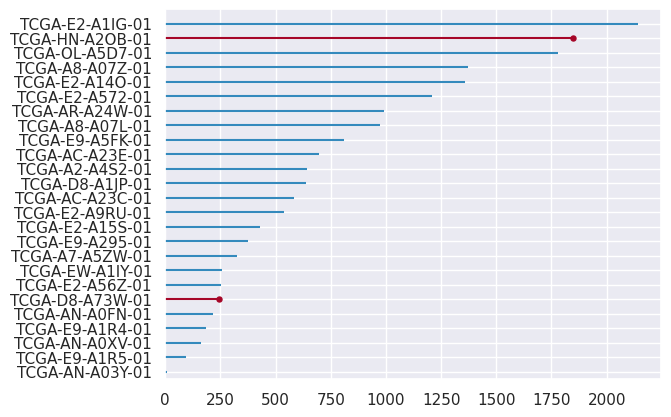

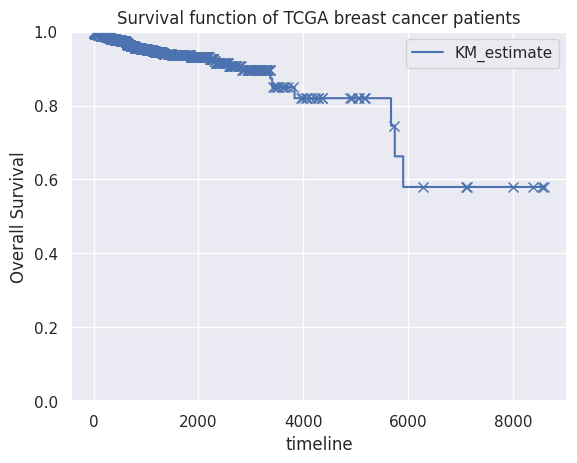

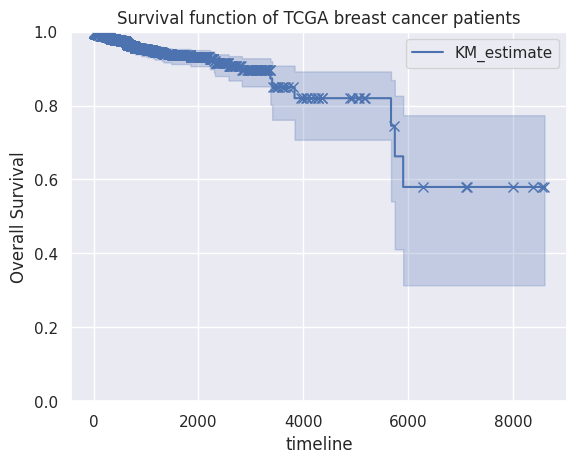

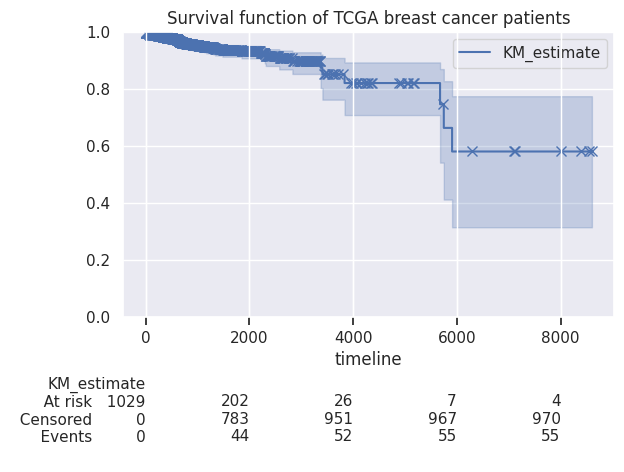

Median survival time (estimate): inf 
Median survival time (estimate) confidence interval: 5749.000000-inf 


/tmp/ipykernel_2086404/855448397.py:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Median survival time (estimate) confidence interval: %f-%f " %(median_ci['KM_estimate_lower_0.95'],median_ci['KM_estimate_upper_0.95']))


In [3]:
from lifelines.plotting import plot_lifetimes # conda install -c conda-forge lifelines
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from lifelines.utils import median_survival_times


#Visualize survival data for random 25 individuals from our dataset
y_25=y.sample(n=25, random_state=14)
plot_lifetimes(y_25['time'],  event_observed=y_25['status'])
plt.show()


#Visualize survival data for random all individuals using the Kaplan-Meier curve
kmf = KaplanMeierFitter()
kmf.fit(y['time'], event_observed=y['status'])

kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=False)
plt.title('Survival function of TCGA breast cancer patients');
plt.ylim(0, 1)
plt.ylabel("Overall Survival")
plt.show()

#Visualize survival data for random all individuals using the Kaplan-Meier curve - add confidence intervals 
kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True)
plt.title('Survival function of TCGA breast cancer patients');
plt.ylim(0, 1)
plt.ylabel("Overall Survival")
plt.show()

#Visualize survival data for random all individuals using the Kaplan-Meier curve - add counts of patients at risk
kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True, at_risk_counts=True)
plt.title('Survival function of TCGA breast cancer patients');
plt.ylim(0, 1)
plt.ylabel("Overall Survival")
plt.show()


#Print median survival time, and its 95% confidence interval :
print("Median survival time (estimate): %f " %kmf.median_survival_time_)

median_ci = median_survival_times(kmf.confidence_interval_)
print("Median survival time (estimate) confidence interval: %f-%f " %(median_ci['KM_estimate_lower_0.95'],median_ci['KM_estimate_upper_0.95']))


## 4. Plot KM curves for patients overexpressing HER2 (official gene name ERBB2)

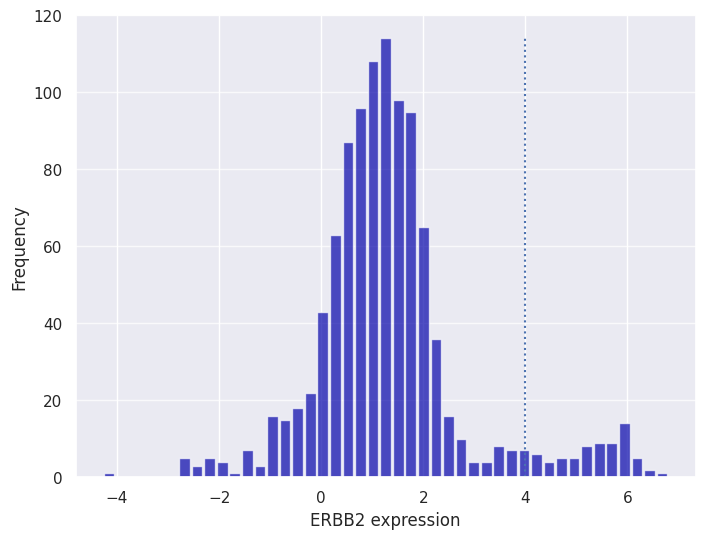

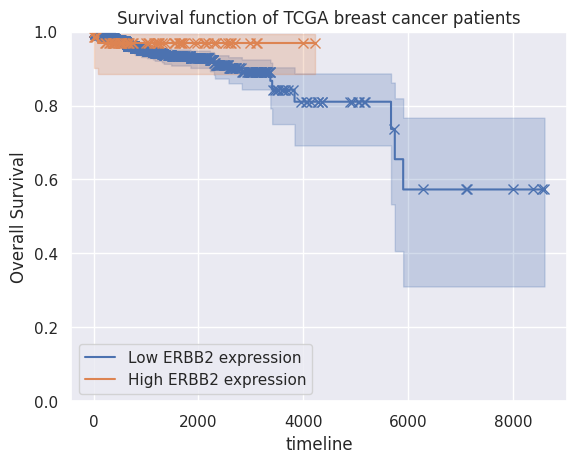

In [4]:
# Plot histogram for the ERBB2 expression:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(8, 6)
n, bins, patches = ax1.hist(x=X['ERBB2'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('ERBB2 expression')
ax1.set_ylabel('Frequency')
maxfreq = n.max()
# Set a clean upper y-axis limit.
ax1.set_ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


#Let's use threshold of 4 to get patients with overexpressed ERBB2:
exp_threshold=4
plt.vlines(x=exp_threshold, ymin=0, ymax=maxfreq ,colors=None, linestyles='dotted')

plt.show()

i1=(X['ERBB2'] <= exp_threshold)
i2=(X['ERBB2'] > exp_threshold)

#Plot KM curves for the two groups of patients:

kmf = KaplanMeierFitter()
kmf.fit(y['time'][i1], event_observed=y['status'][i1])
kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True, label="Low ERBB2 expression")

kmf.fit(y['time'][i2], event_observed=y['status'][i2])
kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True, label="High ERBB2 expression")
plt.legend(loc="lower left", shadow=False, scatterpoints=1)

plt.title('Survival function of TCGA breast cancer patients');
plt.ylim(0, 1)
plt.ylabel("Overall Survival")
plt.show()



## 5. Calculate log-rank test for these two groups

In [5]:
from lifelines.statistics import logrank_test

results = logrank_test(y['time'][i1], y['time'][i2], event_observed_A=y['status'][i1], event_observed_B=y['status'][i2])
results.print_summary()

print(results.p_value)        # 0.4047795

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.69 0.40      1.30

0.4047795007695275


## 6. Try different splits for log-rank test

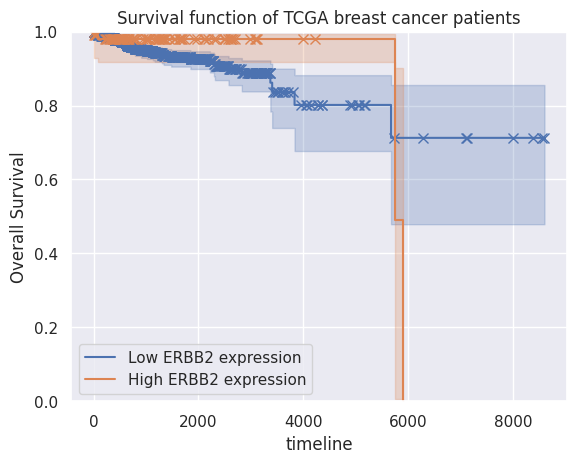

p-value for threshold = 3.000000 : 0.451950


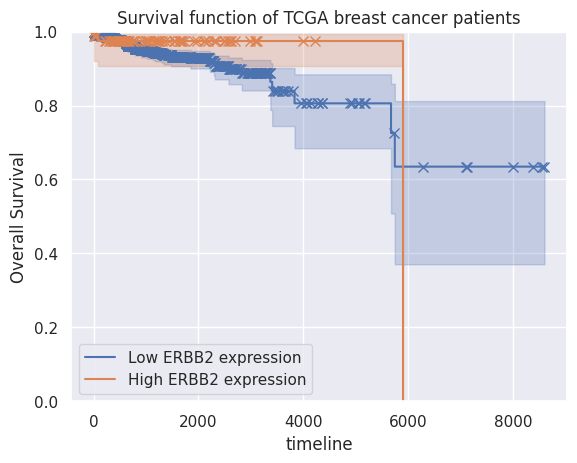

p-value for threshold = 3.500000 : 0.400256


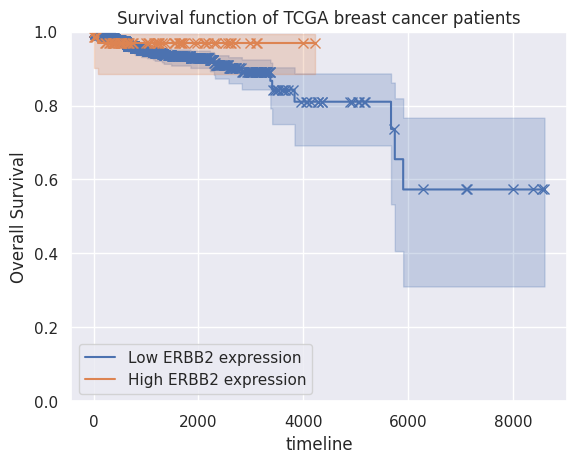

p-value for threshold = 4.000000 : 0.404780


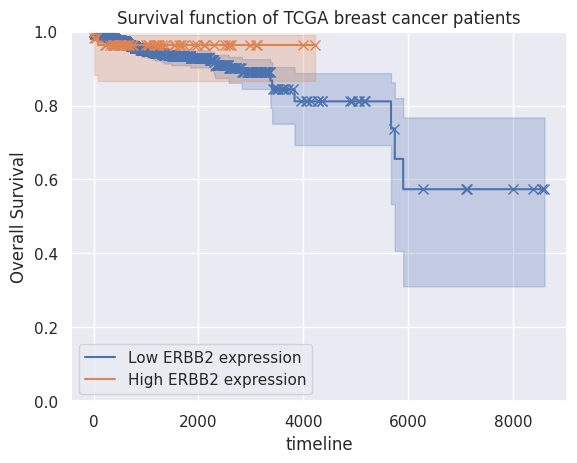

p-value for threshold = 4.500000 : 0.549602


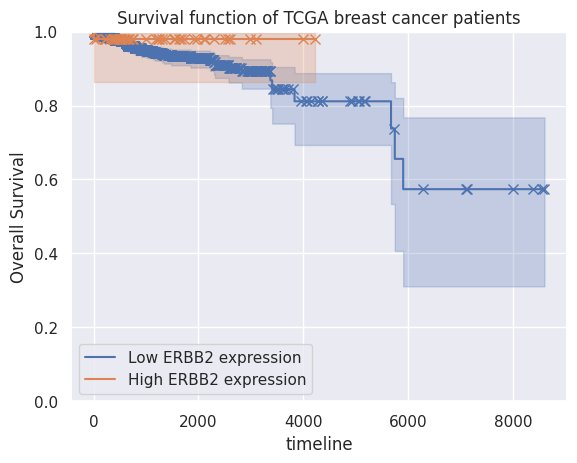

p-value for threshold = 5.000000 : 0.323724

Initial p-values:
[0.45195032 0.40025612 0.4047795  0.54960152 0.32372361]

Adjusted p-values:
[0.54960152 0.54960152 0.54960152 0.54960152 0.54960152]


In [6]:
import statsmodels.stats.multitest as multi

thresholds = (3,3.5,4,4.5,5)

pvalues=np.ones(len(thresholds))

for ind, threshold_value in enumerate(thresholds):    
    i1=(X['ERBB2'] <= threshold_value)
    i2=(X['ERBB2'] > threshold_value)

    #Plot KM curves for the two groups of patients:
    kmf = KaplanMeierFitter()
    kmf.fit(y['time'][i1], event_observed=y['status'][i1])
    kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True, label="Low ERBB2 expression")
    kmf.fit(y['time'][i2], event_observed=y['status'][i2])
    kmf.plot_survival_function(show_censors=True, censor_styles={'ms': 7, 'marker': 'x'}, ci_show=True, label="High ERBB2 expression")
    plt.legend(loc="lower left", shadow=False, scatterpoints=1)
    plt.title('Survival function of TCGA breast cancer patients');
    plt.ylim(0, 1)
    plt.ylabel("Overall Survival")
    plt.show()
    results = logrank_test(y['time'][i1], y['time'][i2], event_observed_A=y['status'][i1], event_observed_B=y['status'][i2])
    print("p-value for threshold = %f : %f" % (threshold_value,results.p_value))
    pvalues[ind]=results.p_value

print("\nInitial p-values:")
print(pvalues)
print("\nAdjusted p-values:")
_, pvals_adj, _, _ = multi.multipletests(pvalues, alpha=0.05, method='fdr_bh')
print(pvals_adj)



## 7. Plot smoothed hasard function

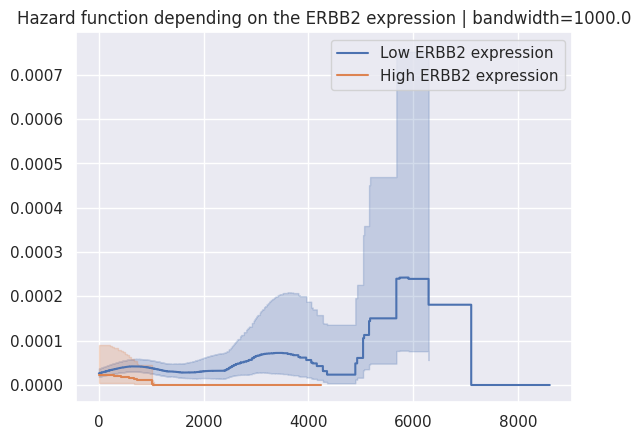

In [7]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

bandwidth = 1000

exp_threshold=4
i1=(X['ERBB2'] <= exp_threshold)
i2=(X['ERBB2'] > exp_threshold)


naf.fit(y['time'][i1], event_observed=y['status'][i1], label="Low ERBB2 expression")
ax = naf.plot_hazard(bandwidth=bandwidth)

naf.fit(y['time'][i2], event_observed=y['status'][i2], label="High ERBB2 expression")
naf.plot_hazard(ax=ax, bandwidth=bandwidth)

plt.title("Hazard function depending on the ERBB2 expression | bandwidth=%.1f" % bandwidth);


## 8. Run Cox proportional hazard model

In [ ]:
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler

#stardartize the data (so that coefficients make more sense):
scaled_X = X.copy()
col_names = X.columns
features = scaled_X[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_X[col_names] = features

scaled_data=pd.concat([scaled_X, y], axis=1)

cph=CoxPHFitter()
cph.fit(scaled_data, "time", event_col="status")
cph.print_summary()

## 9. Plot log(hasard ratio)

In [ ]:
cph.plot()

## 10. Build Cox regression on train and validate on test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=['time','status']), scaled_data[['time','status']], test_size=0.3, shuffle=True, random_state=42) 

#Train CoxPH model on the 70% of the data
print("Training CoxPH model on the train set (70% of data)")
cph=CoxPHFitter()
cph.fit(pd.concat([X_train, y_train], axis=1), "time", event_col="status")
cph.print_summary()

#Validate on the test set (30% of the data)
expectedEventTime=cph.predict_expectation(pd.concat([X_test, y_test], axis=1))


# Print the c-index for the test set:
print('\nConcordance index on the test set (30%% of the data): %.2f' % cph.score(pd.concat([X_test, y_test], axis=1), scoring_method ='concordance_index'))

## 11. Build Cox regression with clinical data only on train and validate on test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data[['stage', 'age']], scaled_data[['time','status']], test_size=0.3, shuffle=True, random_state=42) 

#Train CoxPH model on the 70% of the data
print("Training CoxPH model on the train set (70% of data)")
cph=CoxPHFitter()
cph.fit(pd.concat([X_train, y_train], axis=1), "time", event_col="status")
cph.print_summary()

#Validate on the test set (30% of the data)
expectedEventTime=cph.predict_expectation(pd.concat([X_test, y_test], axis=1))


# Print the c-index for the test set:
print('\nConcordance index on the test set (30%% of the data): %.2f' % cph.score(pd.concat([X_test, y_test], axis=1), scoring_method ='concordance_index'))

## 12. Build Cox regression excluding clinical data on train and validate on test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=['time','status','stage', 'age']), scaled_data[['time','status']], test_size=0.3, shuffle=True, random_state=42) 

#Train CoxPH model on the 70% of the data
print("Training CoxPH model on the train set (70% of data)")
cph=CoxPHFitter()
cph.fit(pd.concat([X_train, y_train], axis=1), "time", event_col="status")
cph.print_summary()

#Validate on the test set (30% of the data)
expectedEventTime=cph.predict_expectation(pd.concat([X_test, y_test], axis=1))


# Print the c-index for the test set:
print('\nConcordance index on the test set (30%% of the data): %.2f' % cph.score(pd.concat([X_test, y_test], axis=1), scoring_method ='concordance_index'))

## 13. Build LASSO Cox regression on train and validate on test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=['time','status']), scaled_data[['time','status']], test_size=0.3, shuffle=True, random_state=42) 

#Train LASSO CoxPH model on the 70% of the data
print("Training CoxPH model on the train set (70% of data)")

myLambda=0.04 #in theory, you can find the best values of Lambda using Cross-Validation (check the lecture and Jupiter NB on Regression)

print('Will use Lambda = %.2f' % myLambda)

cph=CoxPHFitter(penalizer=myLambda, l1_ratio = 1) # set l1_ratio = 0 to do Ridge regression, or a value between 0 and 1 for the Elastic Net
cph.fit(pd.concat([X_train, y_train], axis=1), "time", event_col="status")
cph.print_summary()

#Validate on the test set (30% of the data)
expectedEventTime=cph.predict_expectation(pd.concat([X_test, y_test], axis=1))


# Print the c-index for the test set:
print('\nConcordance index on the test set (30%% of the data): %.2f' % cph.score(pd.concat([X_test, y_test], axis=1), scoring_method ='concordance_index'))

## 14. Run Random Survival Forest on our data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2 #conda install -c sebp scikit-survival
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest

y=scaled_data[['status','time']]
y["status"] = y["status"].astype(bool)
y=y.to_records(index=False)

X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=['status','time']), y, test_size=0.3, shuffle=True, random_state=42) 

#Train Random Forest model on the 70% of the data
print("Training Random Forest model on the train set (70% of data)")

nTrees=40 #in theory, you can find the best values of Lambda using Cross-Validation (check the lecture and Jupiter NB on Regression)
my_max_depth=2  #in theory, you can find the best values of tree depth using Cross-Validation (check the lecture and Jupiter NB on Regression)

print('Will use %d trees' % nTrees)
print('Will use maximal depth = %d' % my_max_depth)

rsf = RandomSurvivalForest(n_estimators=nTrees,
                           max_depth = my_max_depth,                          
                           n_jobs=-1,
                           random_state=42)

rsf.fit(X_train, y_train)

print('Concordance index on the training set: %.2f' % rsf.score(X_train, y_train))

print('Concordance index on the test set:%.2f' % rsf.score(X_test, y_test))
